This notebook creates and trains a Random Forest model which deals with count-based encoded data.

In [1]:
# Read data

import pandas as pd

# Possible critical alarm types
critical_alarm_types = [7,15,16,21,33,56,68,95,1000,1001]
df = pd.DataFrame()

for i in critical_alarm_types:
    # Replace the link according to the data you want to read (All, Unique Samples, Random Samples)
    type_df = pd.read_csv("../Data/Train/Random Samples/Count-based/" + str(i) + "_countbased.csv")
    df = pd.concat([df, type_df], ignore_index=True)

X = df.drop(columns=['y']).values
y = df['y'].values

If you wish to perform an upsampling using SMOTE, run the following cell. If you do not wish to perform an upsampling, bypass the following cell and run the next one.

In [2]:
# Upsampling using SMOTE

from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

In [3]:
# Train-test-split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.33)

In [4]:
# Create model

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion = "entropy", n_estimators = 40, max_features=7, min_samples_split=2, min_samples_leaf=2)
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=7, min_samples_leaf=2,
                       n_estimators=40)

In [5]:
# Save model

import joblib

joblib.dump(model, 'RF_All_Countbased.joblib')

['RF_All_Countbased.joblib']

In [6]:
# Prediction with test data

y_pred = model.predict(X_test)

In [7]:
# Print classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           7       0.83      0.86      0.84      3280
          15       0.84      0.87      0.85      3277
          16       0.94      0.86      0.90      3319
          21       0.73      0.86      0.79      3296
          33       0.32      0.16      0.22      3272
          56       0.77      0.41      0.53      3285
          68       0.40      0.59      0.48      3377
          95       0.58      0.87      0.70      3326
        1000       0.74      0.65      0.69      3243
        1001       0.37      0.36      0.36      3325

    accuracy                           0.65     33000
   macro avg       0.65      0.65      0.64     33000
weighted avg       0.65      0.65      0.64     33000



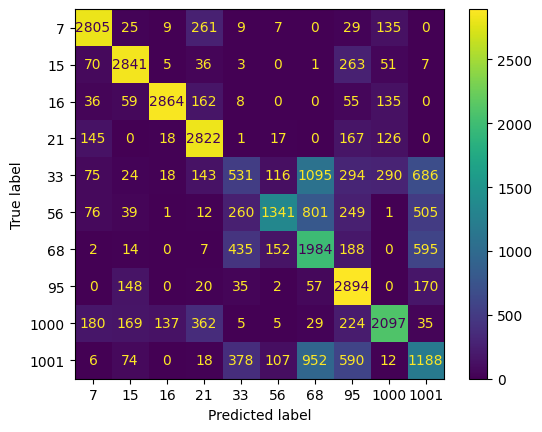

In [8]:
# Print confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()